In [1]:
import pandas as pd

In [2]:
data2 = pd.read_csv('data2.csv')

In [4]:
data2.dtypes

to.id                     object
order_source_platform      int64
venue.country              int64
type                       int64
status                     int64
review.rating            float64
rush_order                  bool
credits_used_amount        int64
payment_method_type        int64
to.type                    int64
delivery_method            int64
to_EUR                   float64
time_received             object
last_purchase              int64
Category                   int64
estimate_delivery        float64
dtype: object

In [3]:
df = data2[['time_received', 'to_EUR']].copy(data2[['time_received', 'to_EUR']].copy()

In [4]:
df

,time_received,to_EUR
0,2018-06-07 15:51:05.327000+00:00,2390.0
1,2018-06-04 10:29:30.644000+00:00,3270.0
2,2018-06-07 14:13:19.276000+00:00,2180.0
3,2018-06-06 15:23:37.168000+00:00,1390.0
4,2018-05-30 09:27:37.392000+00:00,1450.0
...,...,...
78322,2018-06-07 15:06:14.878000+00:00,4740.0
78323,2018-06-07 11:52:20.854000+00:00,2790.0
78324,2018-06-05 16:20:59.853000+00:00,1590.0
78325,2018-06-05 16:20:59.853000+00:00,2290.0


In [5]:
#df['time_received'].me(), df['time_received'].max()

In [6]:
df['time_received'] =  pd.to_datetime(df['time_received'])

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.dates as mdates
import datetime

In [8]:
df = df.set_index('time_received')
df.index

DatetimeIndex(['2018-06-07 15:51:05.327000+00:00',
               '2018-06-04 10:29:30.644000+00:00',
               '2018-06-07 14:13:19.276000+00:00',
               '2018-06-06 15:23:37.168000+00:00',
               '2018-05-30 09:27:37.392000+00:00',
               '2018-05-30 09:27:37.392000+00:00',
               '2018-06-04 13:29:16.758000+00:00',
               '2018-06-07 18:06:41.558000+00:00',
               '2018-06-07 08:52:28.776000+00:00',
               '2018-06-02 11:22:36.521000+00:00',
               ...
               '2018-05-23 15:46:57.869000+00:00',
               '2018-06-07 15:06:14.878000+00:00',
               '2018-06-07 17:05:02.592000+00:00',
               '2018-06-07 15:06:14.878000+00:00',
               '2018-06-07 17:05:02.592000+00:00',
               '2018-06-07 15:06:14.878000+00:00',
               '2018-06-07 11:52:20.854000+00:00',
               '2018-06-05 16:20:59.853000+00:00',
               '2018-06-05 16:20:59.853000+00:00',
            

In [9]:
df.dtypes

to_EUR    float64
dtype: object

In [10]:
y = df.resample('M').mean()

# Visualising transactions by time series data

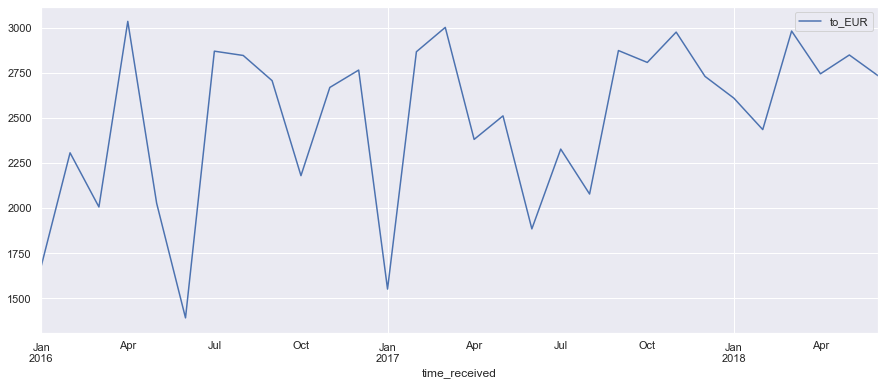

In [11]:
y.plot(figsize=(15, 6), use_index=True)
plt.show()

In [12]:
#some downtimes of the purchase: in the beginning of the year, and the summer time, and mid autumn

In [13]:
y.head()

,to_EUR
time_received,
2016-01-31 00:00:00+00:00,1675.727273
2016-02-29 00:00:00+00:00,2305.435484
2016-03-31 00:00:00+00:00,2004.714286
2016-04-30 00:00:00+00:00,3035.249602
2016-05-31 00:00:00+00:00,2025.326633


## Apply ARIMA

In [14]:
import itertools

In [15]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [17]:
import statsmodels.api as sm

In [18]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2412      5.454      0.044      0.965     -10.449      10.931
ma.L1         -0.9997      7.476     -0.134      0.894     -15.652      13.653
ar.S.L12      -0.1784      9.214     -0.019      0.985     -18.238      17.881
sigma2      8.948e+04   8.34e-05   1.07e+09      0.000    8.95e+04    8.95e+04


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3098: UserWarning: Early subset of data for variable 0  has too few non-missing observations to calculate test statistic.
  warnings.warn('Early subset of data for variable %d'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3103: UserWarning: Later subset of data for variable 0  has too few non-missing observations to calculate test statistic.
  warnings.warn('Later subset of data for variable %d'


In [19]:
#results.plot_diagnostics(figsize=(10, 15))
#plt.show()

# Validating model

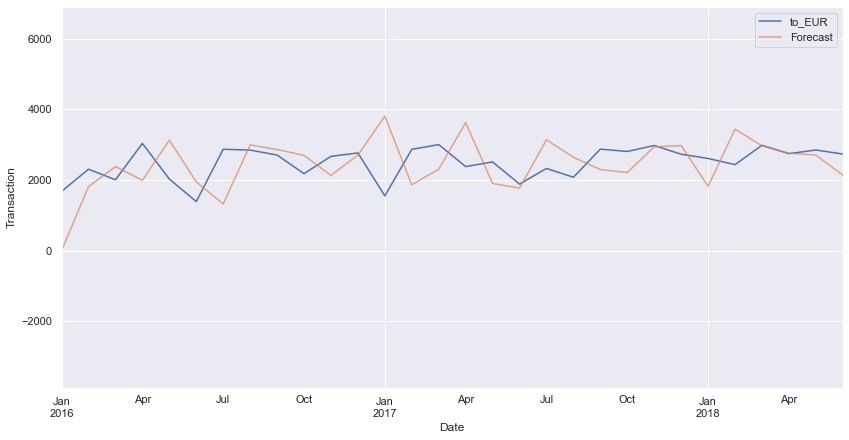

In [20]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-31 00:00:00+00:00'))
pred_ci = pred.conf_int()

ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], alpha=0)

ax.set_xlabel('Date')
ax.set_ylabel('Transaction')
plt.legend()

plt.show()

# Prediction

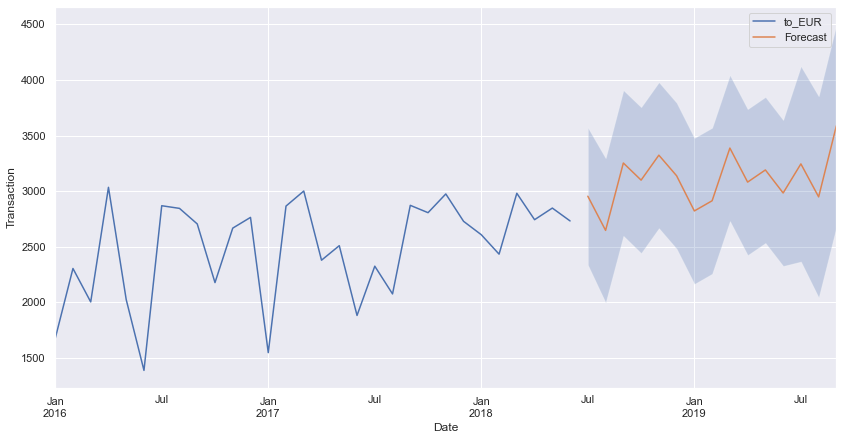

In [22]:
pred_uc = results.get_forecast(steps=15)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Transaction')

plt.legend()
plt.show()